# nuScenes tutorial

<video controls>
    <source src="https://enpei-md.oss-cn-hangzhou.aliyuncs.com/nuScenes%20dataset%20-%20scene%200238.mp4" type="video/mp4" loop controls>
    Your browser doesn't support HTML5 video tag.
</video>

scene : This can be understood as a segment of video, typically around 20 seconds in length. Data: scene.json

A scene contains multiple sample (frames): Collected at a frequency of 2 Hz (every 0.5 seconds). Data: sample.json

Each sample includes multiple sample_data (sensor collection data: images, point clouds, etc.), storing the raw data from sensors (images, point clouds). To ensure synchronization, the timestamps of all sensor data should be very close to the timestamp of the sample they correspond to. Data: sample_data.json

Each sample contains multiple sample_annotation (annotations), which store the bounding box information for a specific object that appears in the sample. Data: sample_annotation.json

instance: This can be understood as the same object being tracked, for example, annotations of the same car in different frames are the same instance, but the same car across different scenes is considered a different instance.

In [1]:
# Import the NuScenes auxiliary library
from nuscenes.nuscenes import NuScenes
# Read the dataset
nusc = NuScenes(version='v1.0-mini', dataroot='./nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.415 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
# View various JSON files:
! tree -L 1 ./nuscenes/v1.0-mini

./nuscenes/v1.0-mini
├── attribute.json
├── calibrated_sensor.json
├── category.json
├── ego_pose.json
├── instance.json
├── log.json
├── map.json
├── sample.json
├── sample_annotation.json
├── sample_data.json
├── scene.json
├── sensor.json
└── visibility.json

0 directories, 13 files


### 1. `scene`

In [3]:
# scene
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

In [4]:
# View the raw data of a scene, which is the data in the scene.json file:
my_scene = nusc.scene[0]
my_scene

{'token': 'cc8c0bf57f984915a77078b10eb33198',
 'log_token': '7e25a2c8ea1f41c5b0da1e69ecfa71a2',
 'nbr_samples': 39,
 'first_sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'last_sample_token': 'ed5fc18c31904f96a8f0dbb99ff069c0',
 'name': 'scene-0061',
 'description': 'Parked truck, construction, intersection, turn left, following a van'}

In [5]:
# nbr_samples: This represents the number of samples (frames) in the scene. You can use this value to iterate through all the samples in the scene.
# first_sample_token: This is the token of the first sample in the scene. You can use this token to access the sample data, which corresponds to the data in the sample.json file.

### 2. `sample`

In [6]:
# Frame
first_sample_token = my_scene['first_sample_token']
print(first_sample_token)

ca9a282c9e77460f8360f564131a8af5


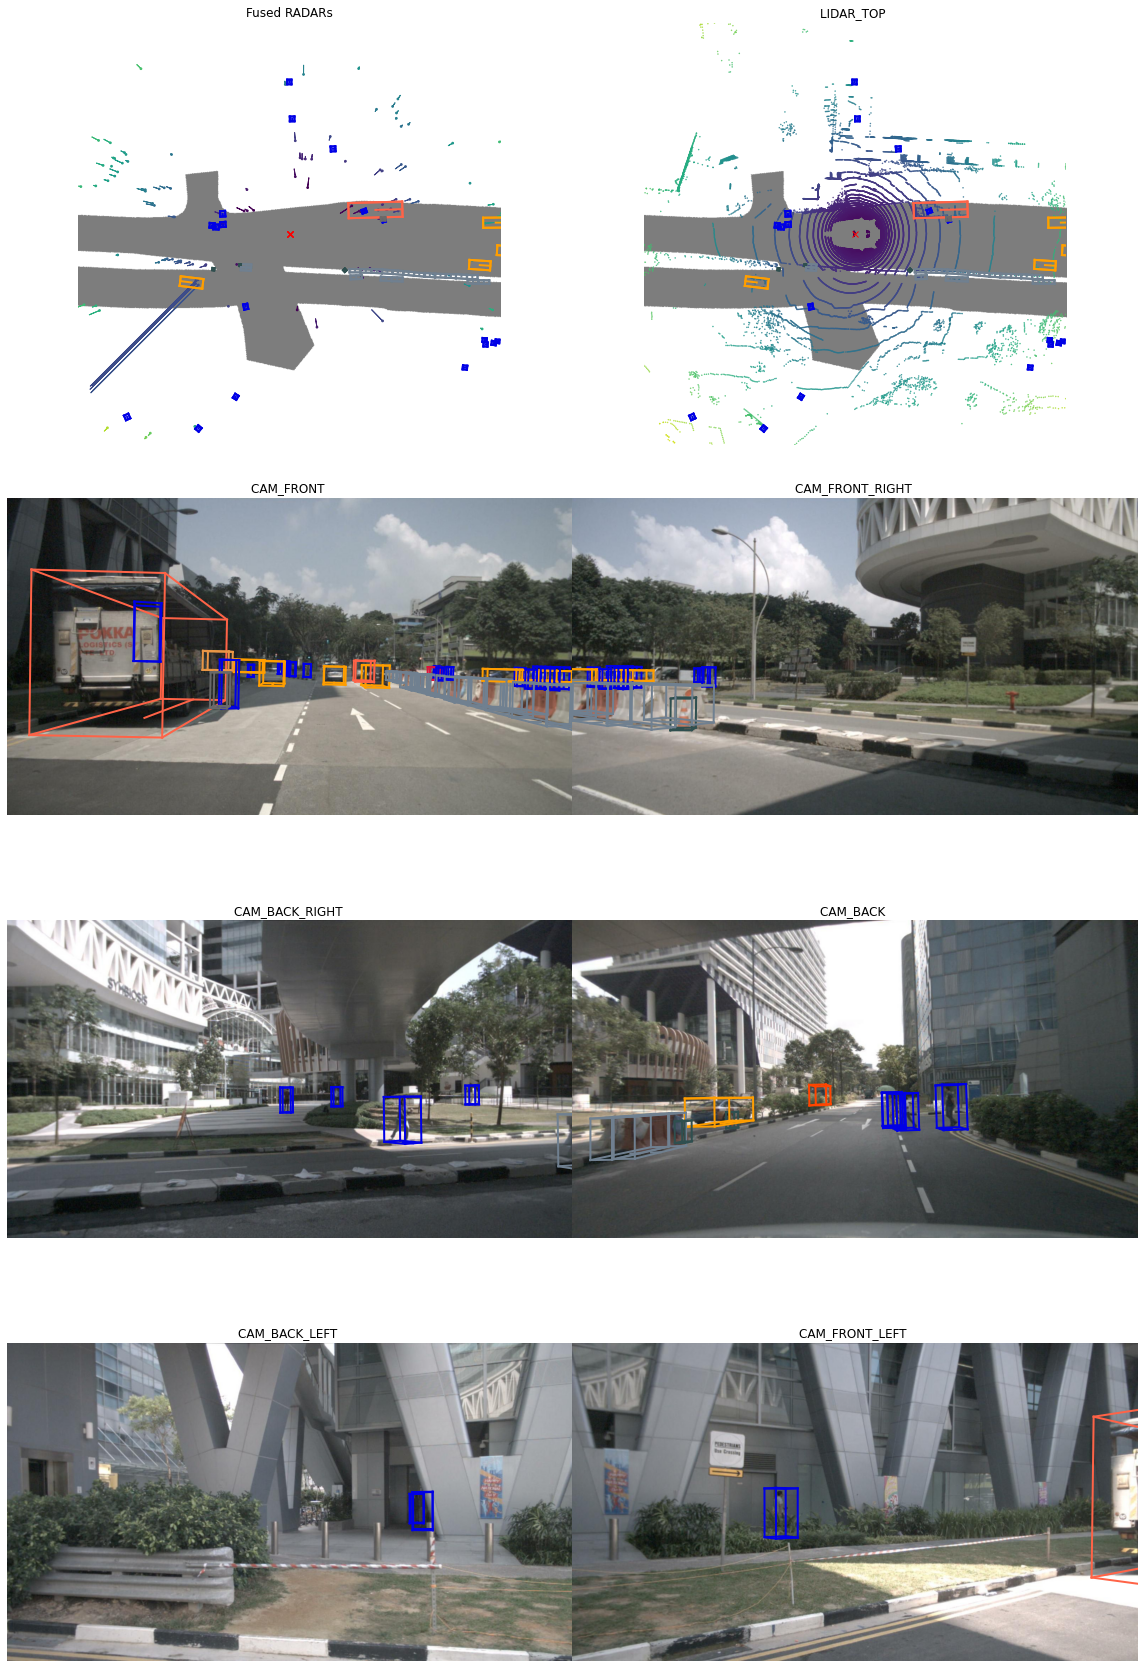

In [7]:
# Render the sample, i.e., render all sensor data in the sample.
# Rendered: Radar, Lidar, 6 Surround View Cameras
nusc.render_sample(first_sample_token)

In [8]:
# View the data in the sample, i.e., the data in sample_data.json.
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'ca9a282c9e77460f8360f564131a8af5',
 'timestamp': 1532402927647951,
 'prev': '',
 'next': '39586f9d59004284a7114a68825e8eec',
 'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
 'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
  'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
  'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
  'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
  'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
  'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
  'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
  'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
  'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
  'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
  'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
  'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
 'anns': ['ef63a697930c4b20a6b9791f423351da',
  '6b89da9bf1f84fd6a5fbe1c3b236f809',
  '924ee6ac1fed440a9d9e3720aac635a0',
  '91e3608f55174a319

In [9]:
# list_sample(): List all sample_data keyframes and sample_annotations related to the sample.
nusc.list_sample(my_sample['token'])

Sample: ca9a282c9e77460f8360f564131a8af5

sample_data_token: 37091c75b9704e0daa829ba56dfa0906, mod: radar, channel: RADAR_FRONT
sample_data_token: 11946c1461d14016a322916157da3c7d, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: 491209956ee3435a9ec173dad3aaf58b, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 312aa38d0e3e4f01b3124c523e6f9776, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 07b30d5eb6104e79be58eadf94382bc1, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 9d9bf11fb0e144c8b446d54a8a00184f, mod: lidar, channel: LIDAR_TOP
sample_data_token: e3d495d4ac534d54b321f50006683844, mod: camera, channel: CAM_FRONT
sample_data_token: aac7867ebf4f446395d29fbd60b63b3b, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 79dbb4460a6b40f49f9c150cb118247e, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 03bea5763f0f4722933508d5999c5fd8, mod: camera, channel: CAM_BACK
sample_data_token: 43893a033f9c46d4a51b5e08a67a1eb7, mod: camera, channel:

### 3. `sample_data`

In [10]:
# View the sensor data in the sample
my_sample['data']

{'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
 'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
 'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
 'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
 'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'}

In [11]:
# From the above output, we can see that each sensor has a token for accessing sensor data, i.e., the data in sample_data.json.
# Select the sensor data for the CAM_FRONT sensor in the current frame.
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

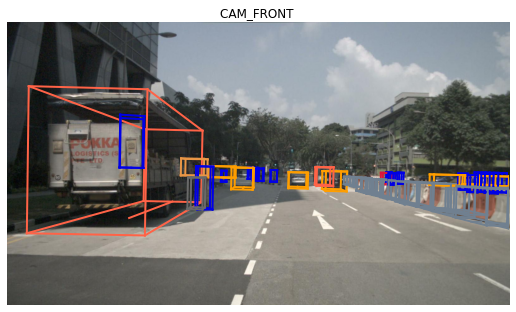

In [12]:
# Render sample data
nusc.render_sample_data(cam_front_data['token'])


### 4. `sample_annotation`，标注

In [14]:
# sample_annotation refers to the annotated bounding box of the object's location observed in the sample. All position data is given relative to the global coordinate system.
my_annotation_token = my_sample['anns'][18]
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)
my_annotation_metadata

{'token': '83d881a6b3d94ef3a3bc3b585cc514f8',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'instance_token': 'e91afa15647c4c4994f19aeb302c7179',
 'visibility_token': '4',
 'attribute_tokens': ['58aa28b1c2a54dc88e169808c07331e3'],
 'translation': [409.989, 1164.099, 1.623],
 'size': [2.877, 10.201, 3.595],
 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791],
 'prev': '',
 'next': 'f3721bdfd7ee4fd2a4f94874286df471',
 'num_lidar_pts': 495,
 'num_radar_pts': 13,
 'category_name': 'vehicle.truck'}

In [15]:
# 'translation': [409.989, 1164.099, 1.623]: The object's position in the global coordinate system, i.e., x, y, z, in meters.
# 'size': [1.938, 4.488, 1.664]: The object's dimensions, i.e., length, width, height, in meters.
# 'rotation': [-0.5828819500503033, 0.0, 0.0, 0.812556848660791]: The object's orientation, represented as a quaternion, which can be converted to Euler angles.

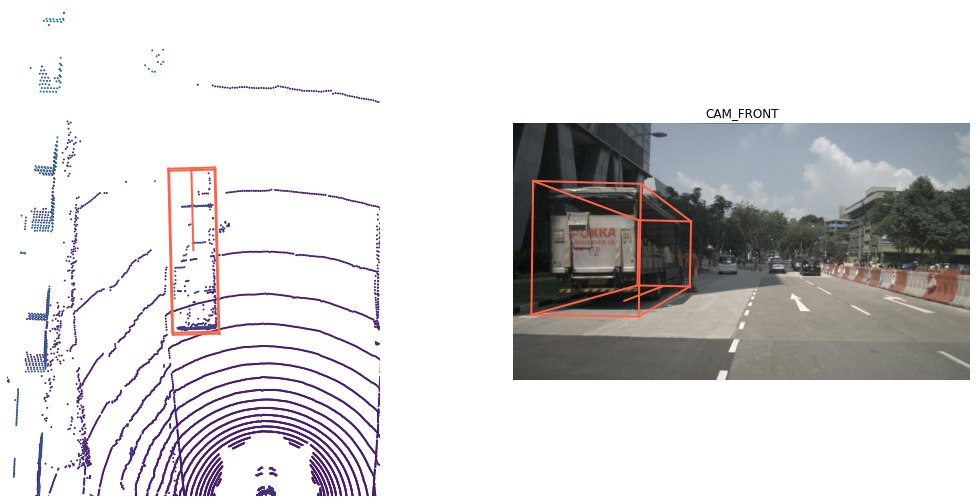

In [16]:
nusc.render_annotation(my_annotation_token)

### 5. `instance`

In [18]:
# instance: An instance can be understood as the same object in tracking, for example, the annotation of the same vehicle in different frames is the same instance.
# However, the same vehicle across different scenes is considered different instances.
my_instance = nusc.instance[599]
my_instance

{'token': '9cba9cd8af85487fb010652c90d845b5',
 'category_token': 'fedb11688db84088883945752e480c2c',
 'nbr_annotations': 16,
 'first_annotation_token': '77afa772cb4a4e5c8a5a53f2019bdba0',
 'last_annotation_token': '6fed6d902e5e487abb7444f62e1a2341'}

In [19]:
# category: The category, for example, car, pedestrian, bicycle, etc.
# nbr_annotations: The number of annotations for this instance across all scenes.
# first_annotation_token: The token of the first annotation of this instance in the first scene, used to access annotation data, that is, the data in sample_annotation.json.

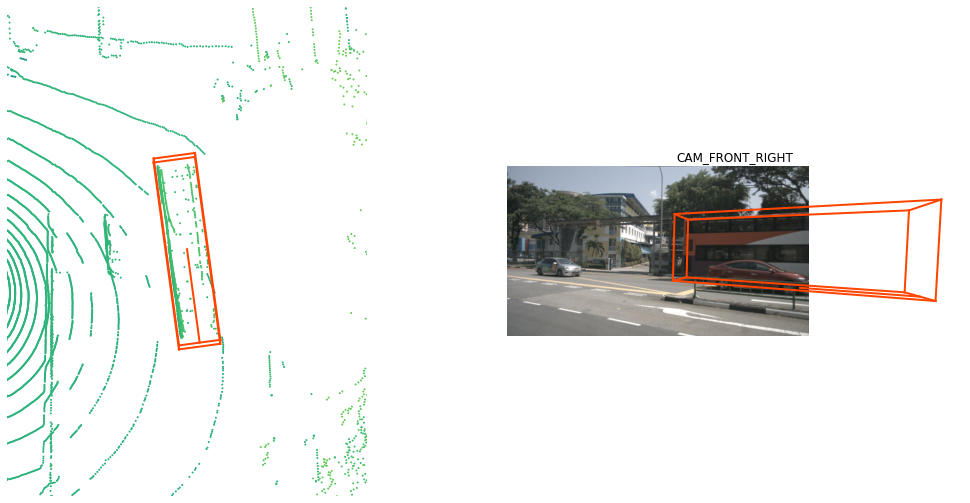

In [20]:
instance_token = my_instance['token']
nusc.render_instance(instance_token)

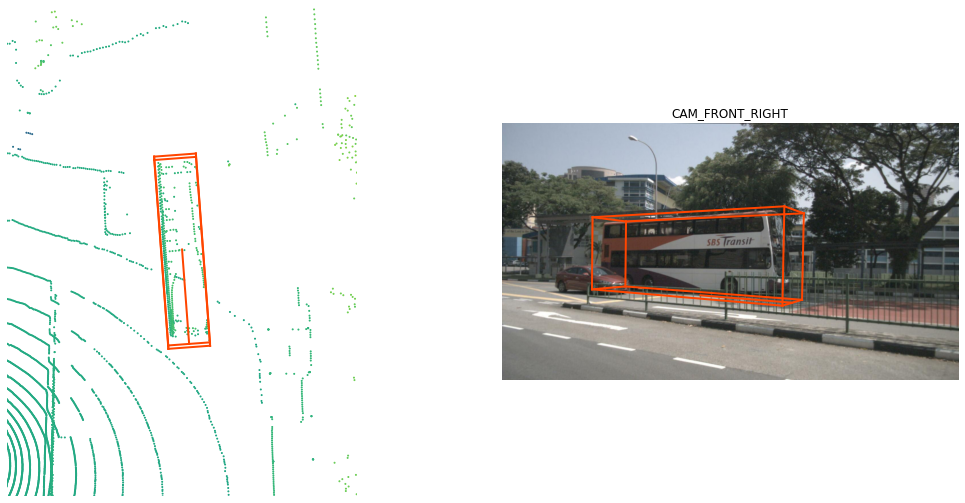

In [21]:
nusc.render_annotation(my_instance['first_annotation_token'])

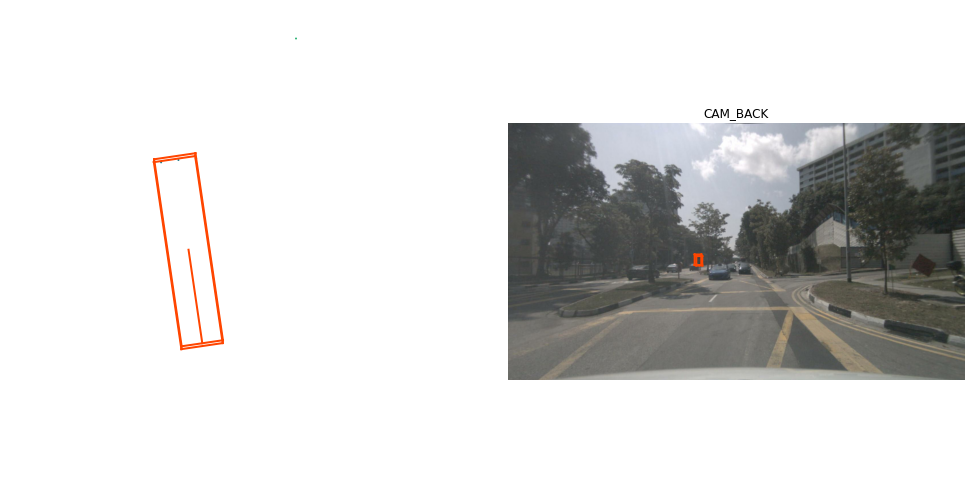

In [22]:
nusc.render_annotation(my_instance['last_annotation_token'])

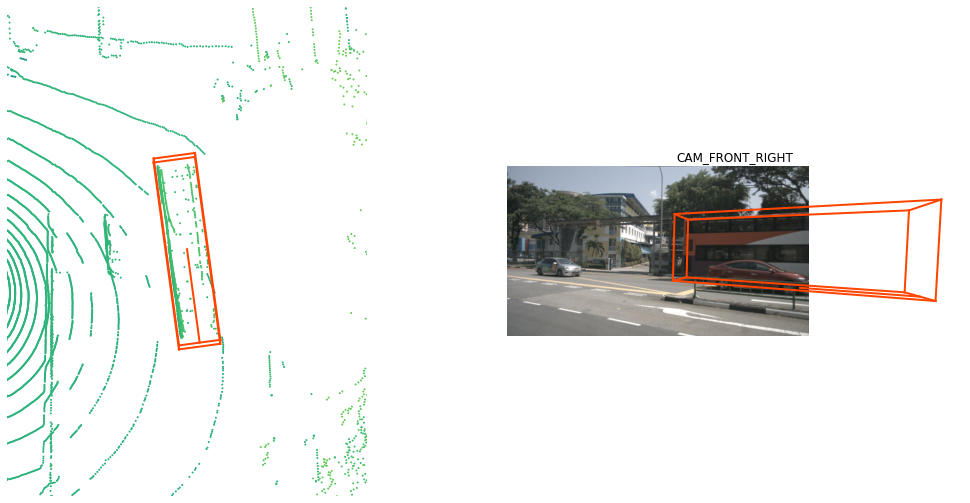

In [23]:
middle_annotation_token = my_instance['last_annotation_token']
for _ in range(14):
    middle_annotation_token = nusc.get('sample_annotation', middle_annotation_token)['prev']
nusc.render_annotation(middle_annotation_token)